In [24]:
from pathlib import Path

DATASET_PATH = Path.home() / "dataset" / "gtzan"
print(f"Dataset will be stored at: {DATASET_PATH}")

Dataset will be stored at: C:\Users\razva\dataset\gtzan


Downloading the dataset if not downloaded already or skipping if downloaded.

In [25]:
import kaggle

if not DATASET_PATH.exists() or not list(DATASET_PATH.iterdir()):
    print("Dataset not found. Downloading from Kaggle...")
    
    DATASET_PATH.mkdir(parents=True, exist_ok=True)

    kaggle.api.dataset_download_files(
        'andradaolteanu/gtzan-dataset-music-genre-classification',
        path=DATASET_PATH,
        unzip=True
    )

    print("\nDownload complete!\n")
else:
    print("Dataset already exists. Skipping download.")

Dataset already exists. Skipping download.


Visualizing the contents of the Data/ folder where the dataset was downloaded.

In [26]:
data_folder = DATASET_PATH / "Data"

if data_folder.exists():
    print("Contents of Data/ folder:")
    print("-" * 50)
    
    for item in data_folder.iterdir():
        if item.is_dir():
            print(f"📁 {item.name}/")
        else:
            print(f"📄 {item.name}")
else:
    print("Data folder doesn't exist!")

Contents of Data/ folder:
--------------------------------------------------
📄 features_30_sec.csv
📄 features_3_sec.csv
📁 genres_original/
📁 images_original/


Checking the shape of the features.

In [27]:
import pandas as pd

csv_path = DATASET_PATH / "Data" / "features_30_sec.csv"

print("Loading dataset...")
df = pd.read_csv(csv_path)

print(f"✓ Dataset loaded!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Loading dataset...
✓ Dataset loaded!
Shape: 1000 rows, 60 columns


Visualizing the first 5 rows of the dataset.

In [28]:
print("First 5 rows of the dataset:")
print("=" * 80)
df.head()

First 5 rows of the dataset:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


Checking the genres we have.

In [29]:
print("Genres in the dataset:")
print("=" * 50)
print(df['label'].value_counts().sort_index())
print()
print(f"Total unique genres: {df['label'].nunique()}")

Genres in the dataset:
label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

Total unique genres: 10


Checking the column names.

In [30]:
print(f"All {len(df.columns)} columns:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

All 60 columns:
 1. filename
 2. length
 3. chroma_stft_mean
 4. chroma_stft_var
 5. rms_mean
 6. rms_var
 7. spectral_centroid_mean
 8. spectral_centroid_var
 9. spectral_bandwidth_mean
10. spectral_bandwidth_var
11. rolloff_mean
12. rolloff_var
13. zero_crossing_rate_mean
14. zero_crossing_rate_var
15. harmony_mean
16. harmony_var
17. perceptr_mean
18. perceptr_var
19. tempo
20. mfcc1_mean
21. mfcc1_var
22. mfcc2_mean
23. mfcc2_var
24. mfcc3_mean
25. mfcc3_var
26. mfcc4_mean
27. mfcc4_var
28. mfcc5_mean
29. mfcc5_var
30. mfcc6_mean
31. mfcc6_var
32. mfcc7_mean
33. mfcc7_var
34. mfcc8_mean
35. mfcc8_var
36. mfcc9_mean
37. mfcc9_var
38. mfcc10_mean
39. mfcc10_var
40. mfcc11_mean
41. mfcc11_var
42. mfcc12_mean
43. mfcc12_var
44. mfcc13_mean
45. mfcc13_var
46. mfcc14_mean
47. mfcc14_var
48. mfcc15_mean
49. mfcc15_var
50. mfcc16_mean
51. mfcc16_var
52. mfcc17_mean
53. mfcc17_var
54. mfcc18_mean
55. mfcc18_var
56. mfcc19_mean
57. mfcc19_var
58. mfcc20_mean
59. mfcc20_var
60. label


# DATA ANALYSIS SECTION

Preparing the data for analysis.

In [31]:
feature_columns = [col for col in df.columns if col not in ['filename', 'length', 'label']]

X = df[feature_columns]
y = df['label']

print(f"Features (X): {X.shape}")
print(f"Labels (y): {y.shape}")
print(f"\nTotal features for analysis: {len(feature_columns)}")

Features (X): (1000, 57)
Labels (y): (1000,)

Total features for analysis: 57


# BASIC STATISTICS
Calculate mean, median, standard deviation, min, max, variance, skewness and kurtosis for all features.

Results are saved to a CSS file named "basic_statistics.csv".

In [32]:
# Calculate basic statistics
stats_df = X.describe().T  # Transpose for better readability

# Add additional statistics
stats_df['variance'] = X.var()
stats_df['skewness'] = X.skew()
stats_df['kurtosis'] = X.kurtosis()

print("Basic Statistics Summary:")
print("=" * 80)
print(stats_df.head(10))

# Save to CSV
stats_df.to_csv('output/basic_statistics.csv')
print("\nStatistics saved to 'basic_statistics.csv'")

Basic Statistics Summary:
                          count          mean           std           min  \
chroma_stft_mean         1000.0  3.786817e-01  8.170489e-02      0.171939   
chroma_stft_var          1000.0  8.633982e-02  7.735298e-03      0.044555   
rms_mean                 1000.0  1.309297e-01  6.568311e-02      0.005276   
rms_var                  1000.0  3.051399e-03  3.634500e-03      0.000004   
spectral_centroid_mean   1000.0  2.201781e+03  7.159606e+02    570.040355   
spectral_centroid_var    1000.0  4.696916e+05  4.008995e+05   7911.251394   
spectral_bandwidth_mean  1000.0  2.242541e+03  5.263165e+02    898.066208   
spectral_bandwidth_var   1000.0  1.370792e+05  9.645567e+04  10787.185064   
rolloff_mean             1000.0  4.571549e+03  1.574792e+03    749.140636   
rolloff_var              1000.0  1.844345e+06  1.425085e+06  14686.118554   

                                   25%           50%           75%  \
chroma_stft_mean              0.319562  3.831479e-01  4.

Visualizing top features by variance.

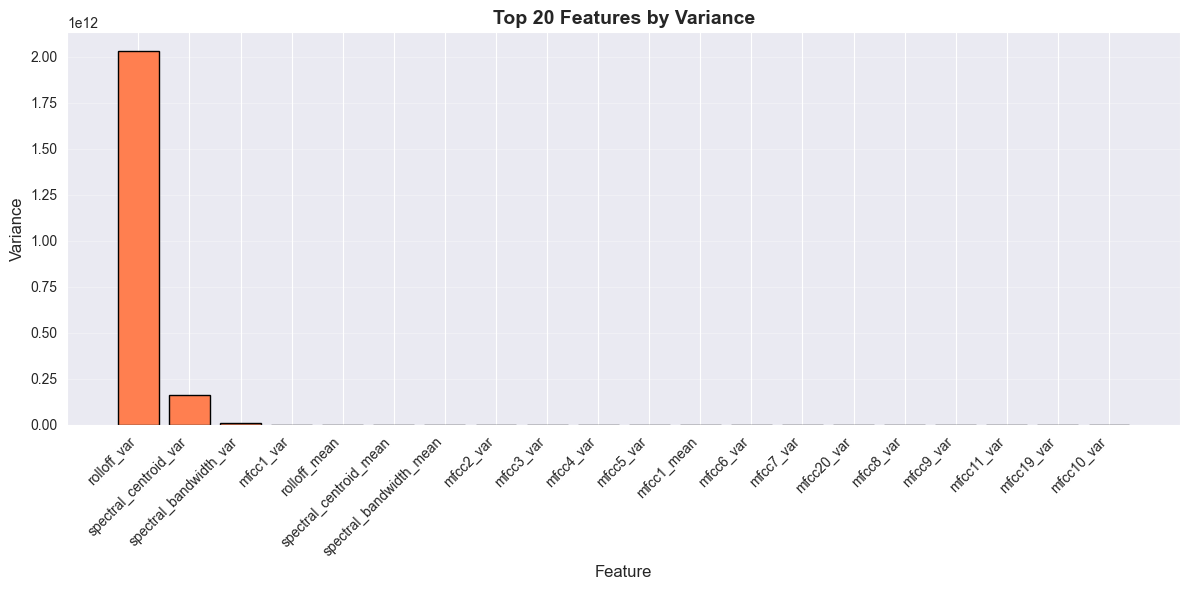

Feature variance plot saved to 'feature_variance.png'


In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

top_var = stats_df['variance'].sort_values(ascending=False).head(20)

plt.bar(range(len(top_var)), top_var.values, color='coral', edgecolor='black')
plt.xticks(range(len(top_var)), top_var.index, rotation=45, ha='right')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.title('Top 20 Features by Variance', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('output/feature_variance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature variance plot saved to 'feature_variance.png'")

Showing distribution of skewness values.

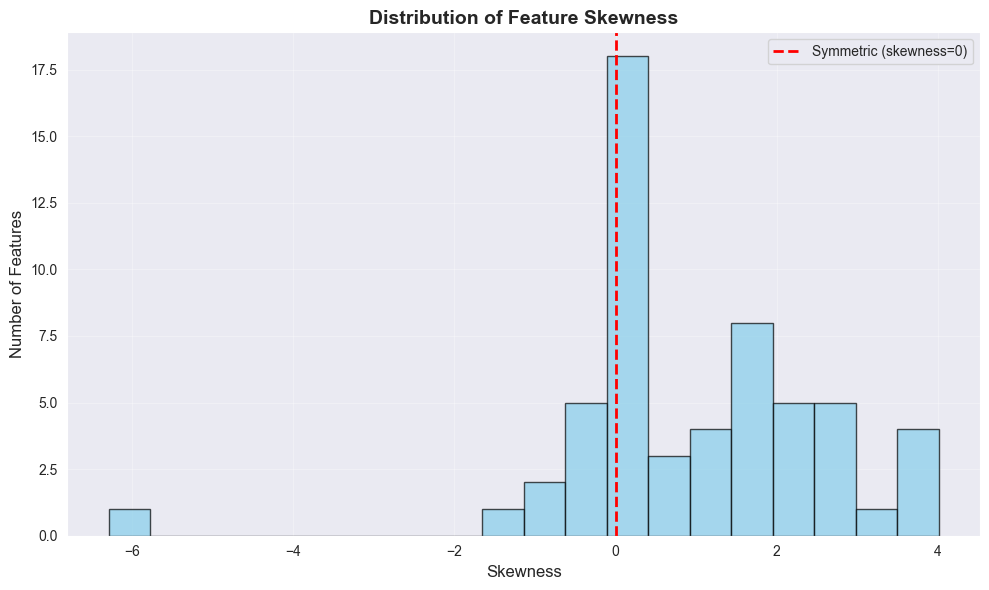

Skewness distribution saved to 'skewness_distribution.png'


In [34]:
plt.figure(figsize=(10, 6))

plt.hist(stats_df['skewness'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Symmetric (skewness=0)')
plt.xlabel('Skewness', fontsize=12)
plt.ylabel('Number of Features', fontsize=12)
plt.title('Distribution of Feature Skewness', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('output/skewness_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Skewness distribution saved to 'skewness_distribution.png'")

# CORRELATION ANALYSIS
Analyze how features are related to each other. High correlation (>0.8 or <-0.8) indicates redundancy.

Results are saved to a CSS file named "correlation_matrix.csv".

In [35]:
# Calculate correlation matrix
corr_matrix = X.corr()

print(f"Correlation matrix shape: {corr_matrix.shape}")
print("\nSample correlations (first 5x5):")
print(corr_matrix.iloc[:5, :5])

# Find highly correlated pairs
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_value
            })

print(f"\nFound {len(high_corr_pairs)} highly correlated pairs (|r| > 0.8)")

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df.to_csv('output/high_correlations.csv', index=False)
    print(f"{len(high_corr_pairs)} highly correlated pairs saved to 'high_correlations.csv'")

# Save correlation matrix
corr_matrix.to_csv('output/correlation_matrix.csv')
print("Correlation matrix saved to 'correlation_matrix.csv'")

Correlation matrix shape: (57, 57)

Sample correlations (first 5x5):
                        chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
chroma_stft_mean                1.000000        -0.461729  0.499926  0.261544   
chroma_stft_var                -0.461729         1.000000 -0.078777  0.290138   
rms_mean                        0.499926        -0.078777  1.000000  0.607399   
rms_var                         0.261544         0.290138  0.607399  1.000000   
spectral_centroid_mean          0.615728        -0.246441  0.510154  0.347831   

                        spectral_centroid_mean  
chroma_stft_mean                      0.615728  
chroma_stft_var                      -0.246441  
rms_mean                              0.510154  
rms_var                               0.347831  
spectral_centroid_mean                1.000000  

Found 22 highly correlated pairs (|r| > 0.8)
22 highly correlated pairs saved to 'high_correlations.csv'
Correlation matrix saved to 'correlation_mat

Visualizing the correlation heatmap, since 22 pairs is significant, meaning there's some feature redundancy.

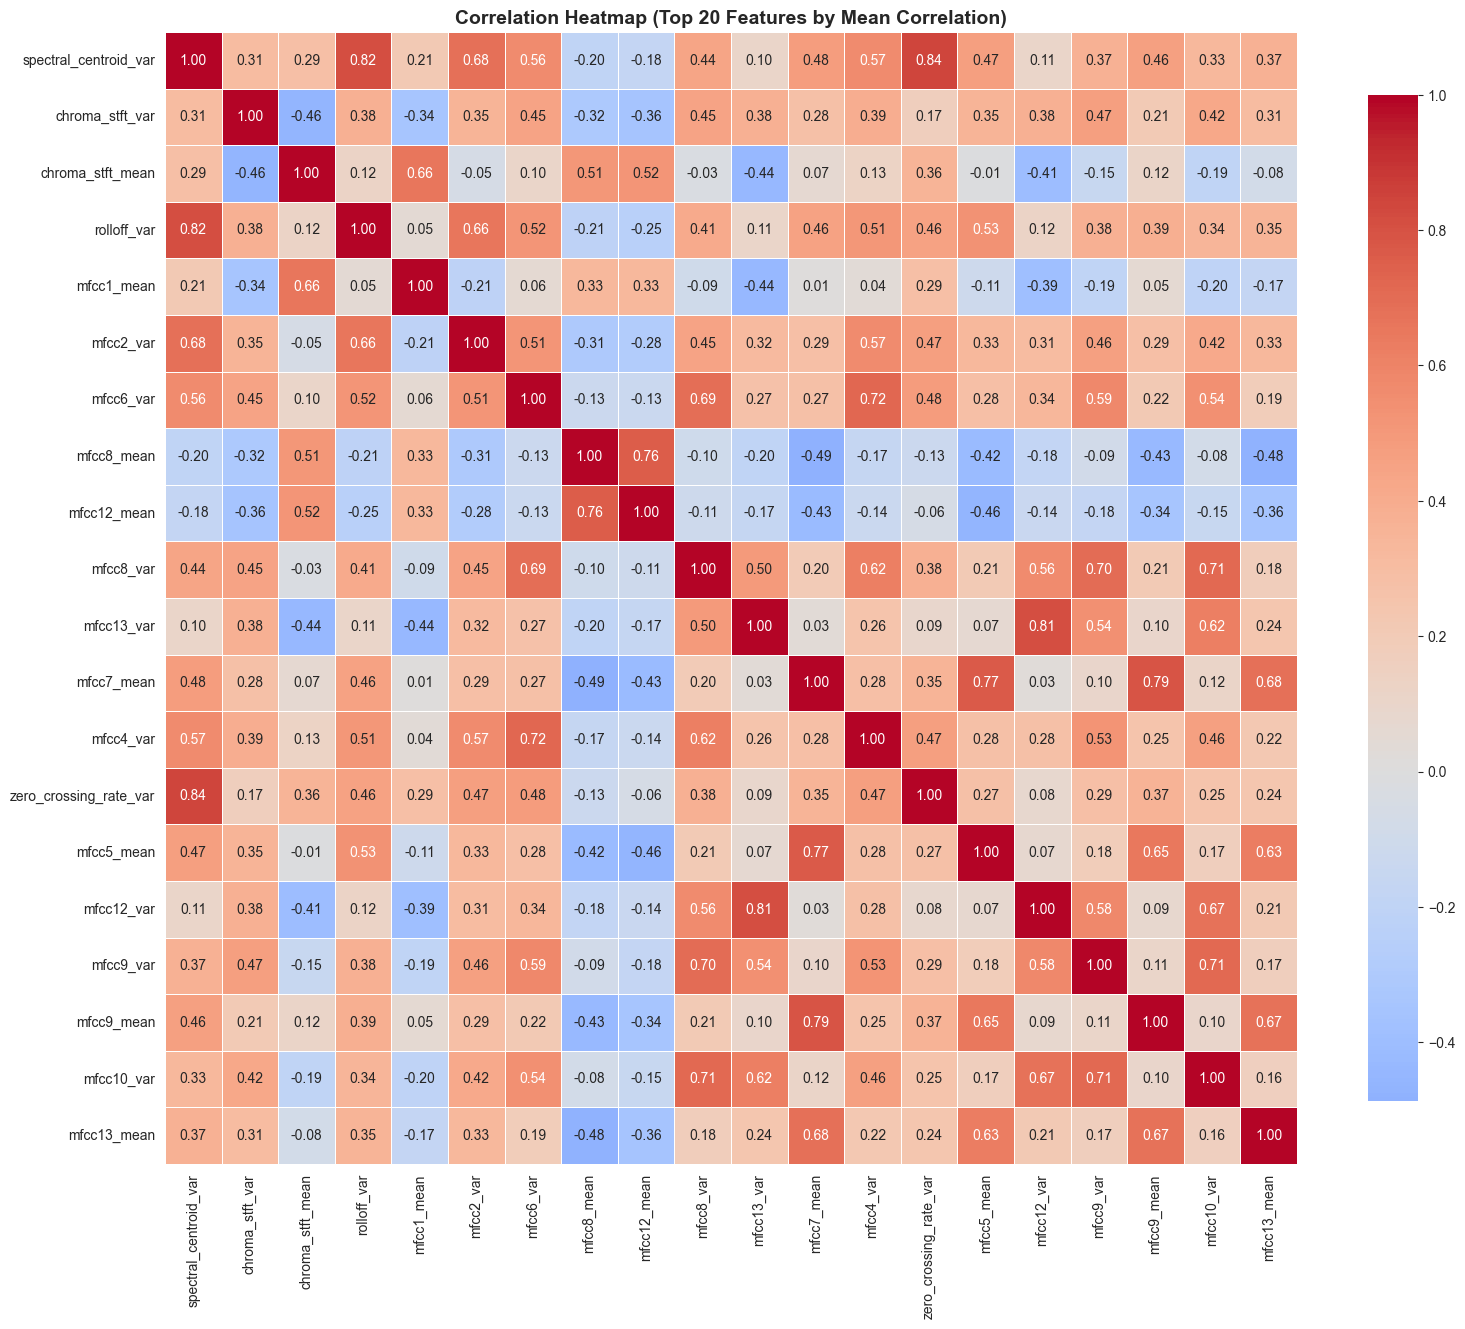

Correlation heatmap saved to 'correlation_heatmap.png'


In [36]:
import seaborn as sns

# Create correlation heatmap
plt.figure(figsize=(16, 14))

# Since we have 57 features, show top 20 by mean correlation
mean_corr = corr_matrix.abs().mean().sort_values(ascending=False)
top_features = mean_corr.head(20).index
corr_subset = corr_matrix.loc[top_features, top_features]

sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap (Top 20 Features by Mean Correlation)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('output/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation heatmap saved to 'correlation_heatmap.png'")

# FEATURE INDEPENDENCE
Test if features provide unique information. Features with |correlation| > 0.7 are considered dependent.

In [37]:
# Count dependent vs independent feature pairs
dependent_pairs = 0
total_pairs = len(corr_matrix.columns) * (len(corr_matrix.columns) - 1) // 2

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            dependent_pairs += 1

independent_pairs = total_pairs - dependent_pairs
independence_ratio = (independent_pairs / total_pairs) * 100

print("Feature Independence Analysis:")
print("=" * 50)
print(f"Total feature pairs: {total_pairs}")
print(f"Dependent pairs (|r| > 0.7): {dependent_pairs}")
print(f"Independent pairs: {independent_pairs}")
print(f"Independence ratio: {independence_ratio:.2f}%")

# Save report
with open('output/independence_report.txt', 'w') as f:
    f.write(f"Total pairs: {total_pairs}\n")
    f.write(f"Dependent pairs: {dependent_pairs}\n")
    f.write(f"Independent pairs: {independent_pairs}\n")
    f.write(f"Independence ratio: {independence_ratio:.2f}%\n")

print("\nIndependence report saved to 'independence_report.txt'")

Feature Independence Analysis:
Total feature pairs: 1596
Dependent pairs (|r| > 0.7): 52
Independent pairs: 1544
Independence ratio: 96.74%

Independence report saved to 'independence_report.txt'


96.74% independence is very good, meaning most features provide unique information, with only ~3% redundancy.

# FEATURE IMPORTANCE
Use Random Forest to rank features by their importance for genre classification.

In [38]:
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest to calculate feature importance...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature importance calculated!")
print("\nTop 10 Most Important Features:")
print("=" * 60)
print(importance_df.head(10).to_string(index=False))

# Save to CSV
importance_df.to_csv('output/feature_importance.csv', index=False)
print("\nFeature importance saved to 'feature_importance.csv'")

Training Random Forest to calculate feature importance...

Feature importance calculated!

Top 10 Most Important Features:
                Feature  Importance
       chroma_stft_mean    0.049638
           perceptr_var    0.039018
        chroma_stft_var    0.035142
               rms_mean    0.033334
             mfcc4_mean    0.030325
spectral_bandwidth_mean    0.029748
                rms_var    0.028476
              mfcc5_var    0.024636
           rolloff_mean    0.024319
            harmony_var    0.024126

Feature importance saved to 'feature_importance.csv'


Visualizing feature importance (for top 20 features).

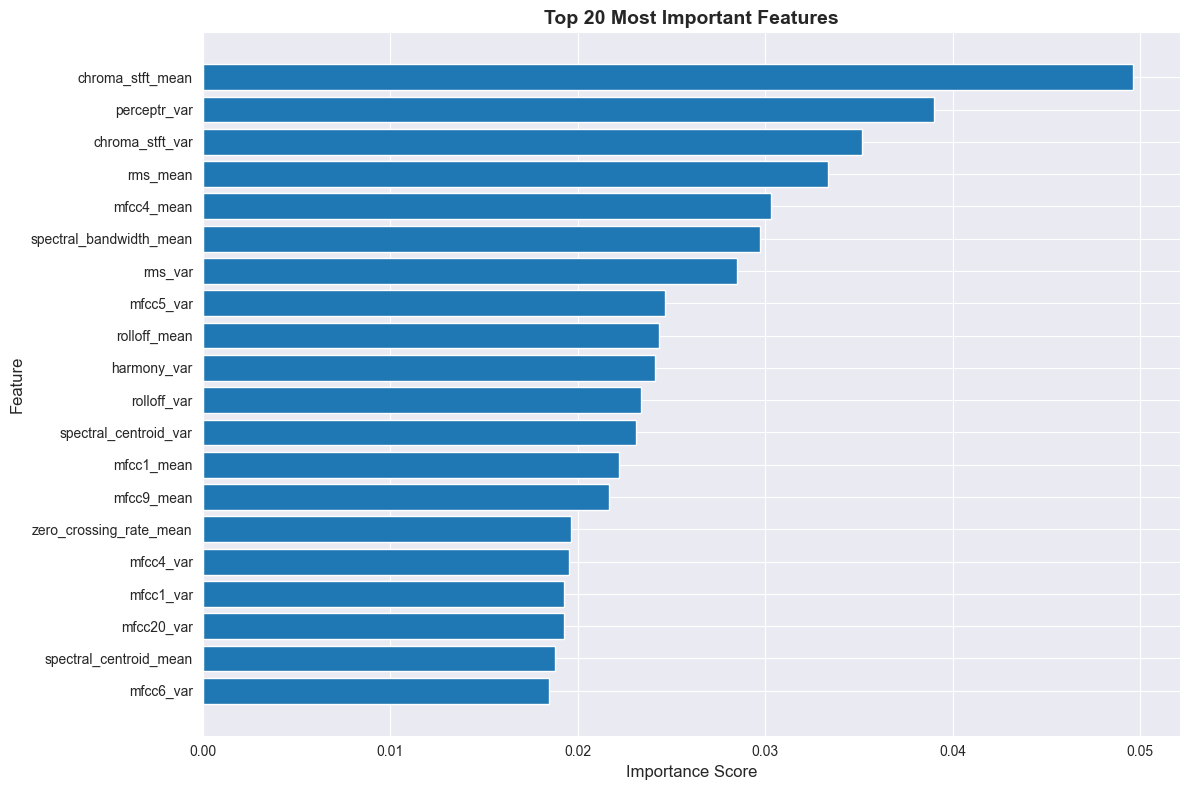

Feature importance plot saved to 'feature_importance.png'


In [39]:
plt.figure(figsize=(12, 8))

top_n = 20
top_features = importance_df.head(top_n)

plt.barh(range(top_n), top_features['Importance'])
plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title(f'Top {top_n} Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('output/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature importance plot saved to 'feature_importance.png'")

# DATA DISTRIBUTION ANALYSIS
## 1. Normality Tests (Shapiro-Wilk and D'Agostino's K-squared)

In [40]:
from scipy.stats import shapiro, normaltest

for col in X.columns:
    data = X[col].sample(min(5000, len(X)), random_state=42) if len(X) > 5000 else X[col]
    
    # Shapiro-Wilk Test
    stat_shapiro, p_shapiro = shapiro(data)
    
    # D'Agostino's K-squared Test
    stat_k2, p_k2 = normaltest(X[col])
    
    # Non-normal if < 0.05
    print(f"  Shapiro-Wilk p-value: {p_shapiro:.4f}")
    print(f"  D'Agostino K2 p-value: {p_k2:.4f}\n")

  Shapiro-Wilk p-value: 0.0001
  D'Agostino K2 p-value: 0.0403

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0008

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0002

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agostino K2 p-value: 0.0000

  Shapiro-Wilk p-value: 0.0000
  D'Agost

The p-values are overwhelmingly close to zero ($p < 0.05$ for nearly all features). This indicates that the null hypothesis (data is normally distributed) is rejected for almost all audio features. Consequently, the feature distributions are non-normal (not Gaussian).

## 2. Distribution Histograms

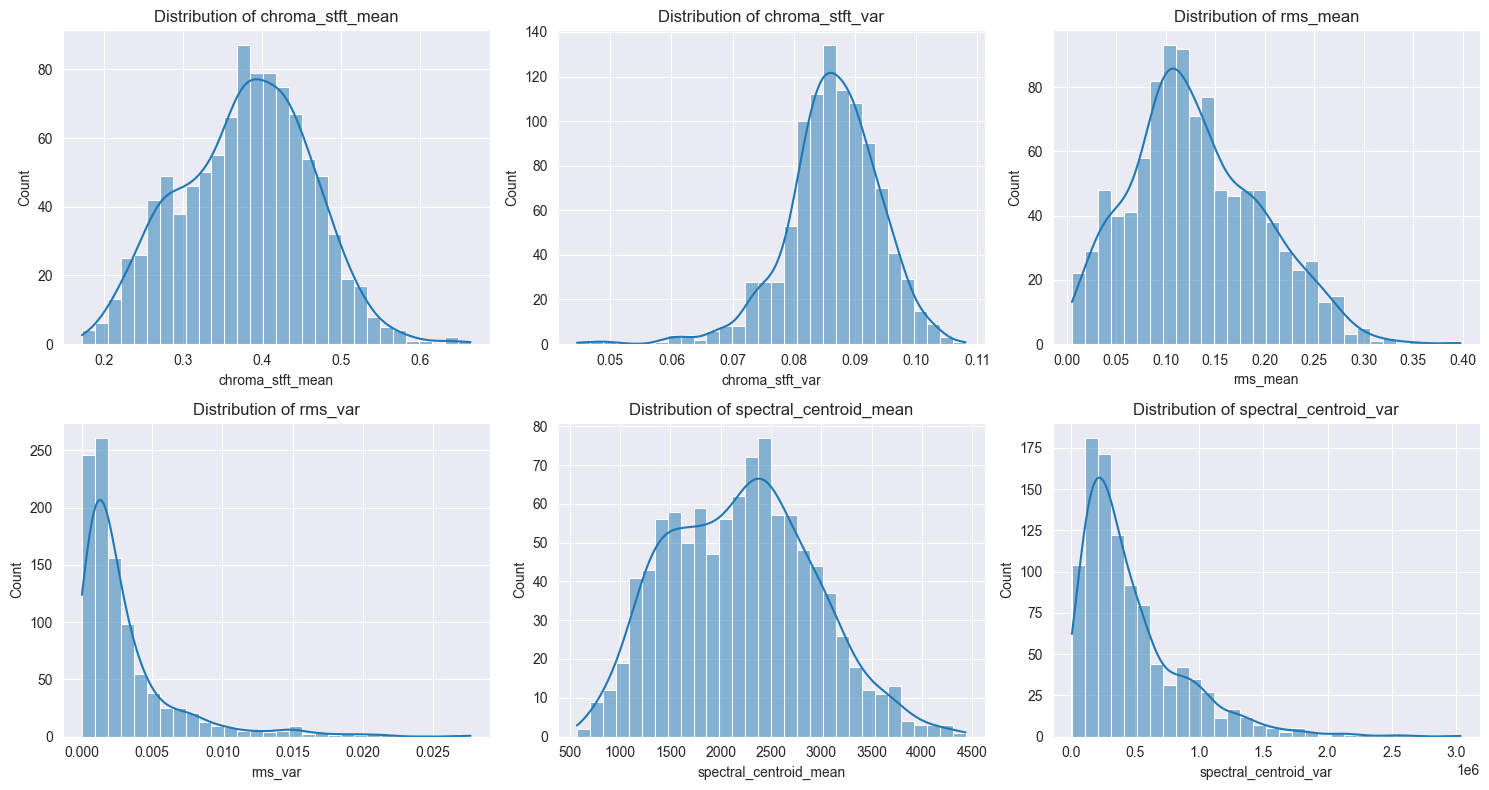

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

key_features = X.columns[:6] 

plt.figure(figsize=(15, 8))
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i + 1)
    # Using seaborn for enhanced visuals
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

The histograms for the selected features (e.g., chroma_stft_mean, rms_mean, spectral_centroid_mean) show distributions that are mostly skewed (some right-skewed, others left-skewed) and generally not symmetric bell curves. This visual evidence confirms the results from the normality tests that the features are non-normally distributed.

## 3. Box Plots for Outliers - Interquartile Range (IQR) rule

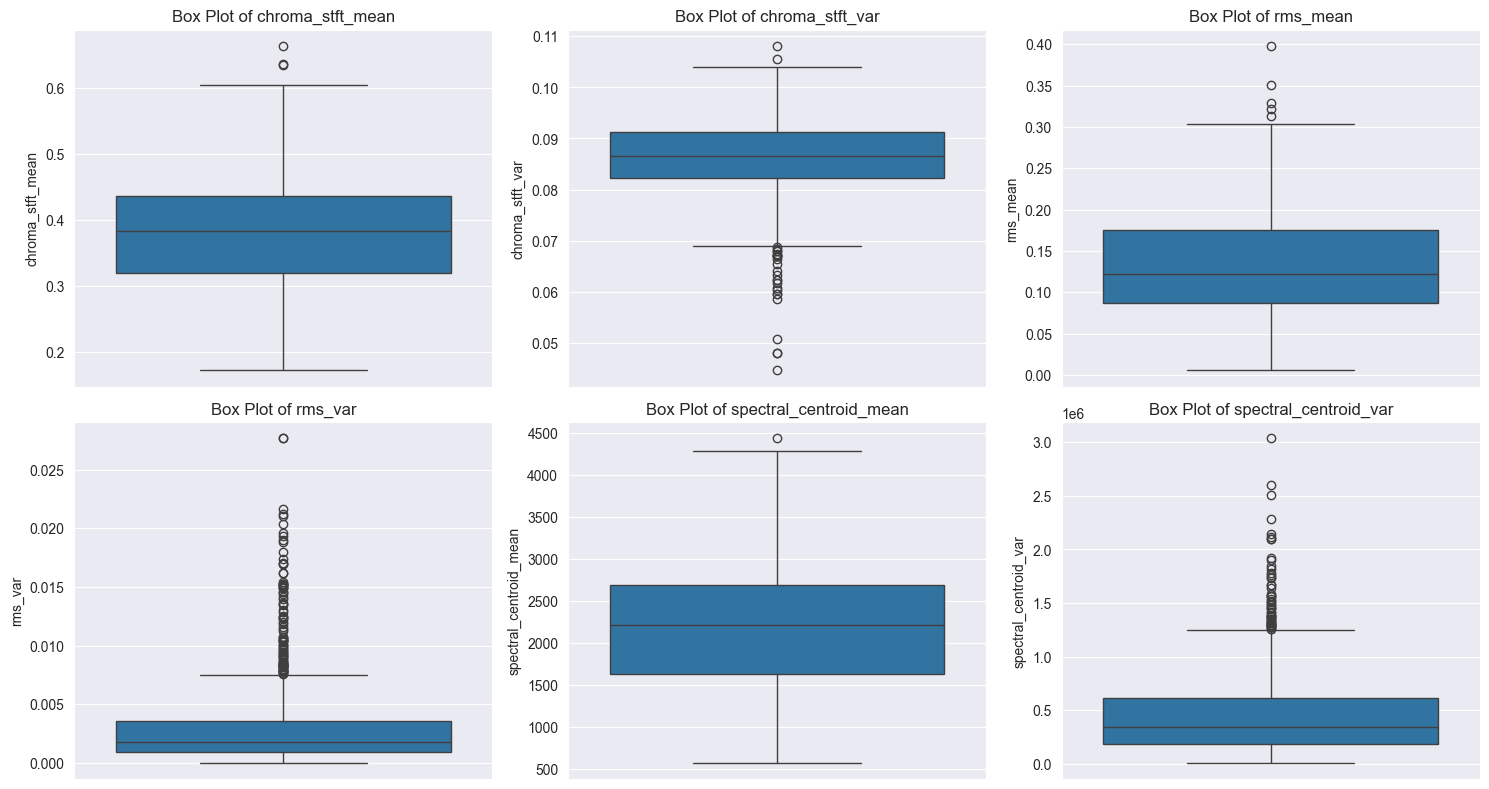

In [42]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=X[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

The box plots clearly show a significant number of outliers (individual circles plotted outside the whiskers) for every feature displayed (e.g., rms_var, spectral_centroid_var). This indicates that the dataset contains samples with feature values that deviate far from the median and interquartile range, requiring potential preprocessing steps like robust scaling or outlier handling.

# DATA VISUALIZATION AND INTERPRETATION
## 1. Principal Component Analysis (PCA)

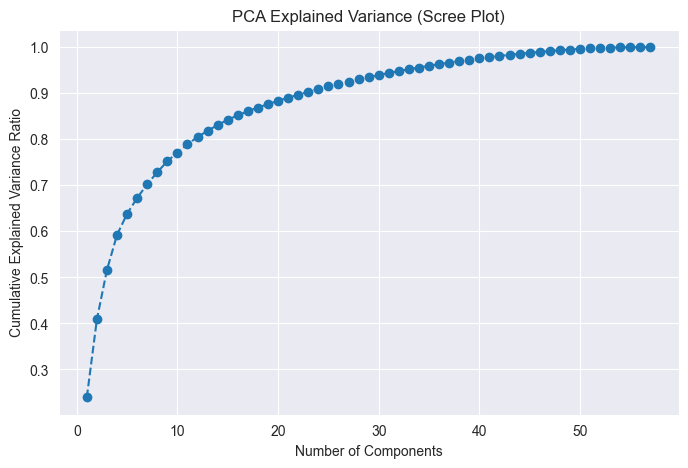

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA
pca = PCA()
pca.fit(X_scaled)

# Scree Plot (Cumulative Explained Variance)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('PCA Explained Variance (Scree Plot)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()
#

The Scree Plot shows that the variance is distributed across many components. To capture 90% of the cumulative explained variance, approximately 27 to 30 principal components are required. This suggests the original features contain complex, non-redundant information, and high dimensionality is necessary to represent the dataset accurately.

## 2. Genre Distribution Bar Chart

C:\Users\razva\AppData\Local\Temp\ipykernel_6448\2057519359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, order=y.value_counts().index, palette="viridis")


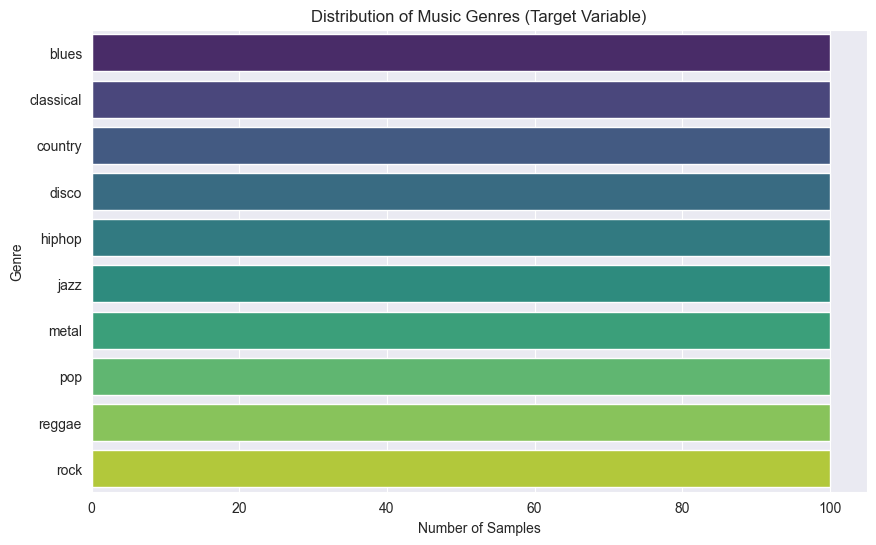

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(y=y, order=y.value_counts().index, palette="viridis")
plt.title('Distribution of Music Genres (Target Variable)')
plt.xlabel('Number of Samples')
plt.ylabel('Genre')
plt.show()

The bar chart shows that all ten music genres have exactly 100 samples each. This confirms that the target variable (music genre) is perfectly balanced, which is ideal for training a robust classification model without needing resampling techniques.

## 3. Variance Analysis

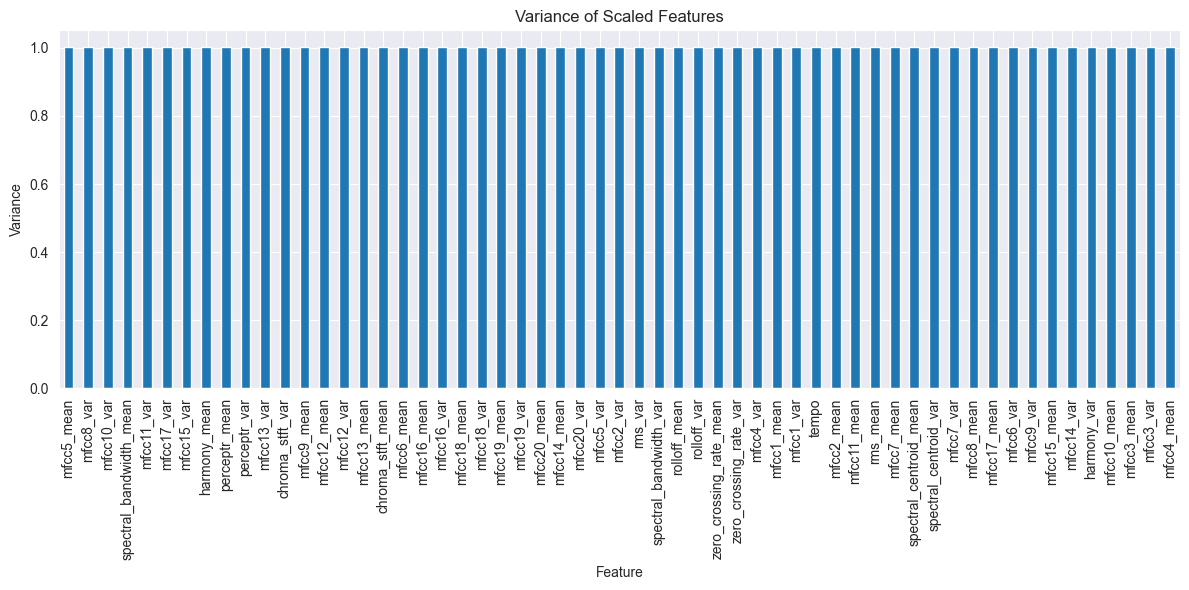

In [45]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
variance_series = scaled_df.var().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
variance_series.plot(kind='bar')
plt.title('Variance of Scaled Features')
plt.ylabel('Variance')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Since the features were Standard Scaled prior to this analysis, the plot correctly shows that the variance of every scaled feature is approximately 1.0. This verifies that the scaling process was successful, ensuring all features contribute equally (based on variance) to the subsequent PCA and model training steps.